In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import sklearn

In [7]:
df = pd.read_csv('Downloads/Loan/Training Data.csv')

In [8]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [9]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [12]:
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
26329,26330,7217848,23,3,single,rented,no,Official,Jhansi,Uttar_Pradesh,3,13,0
197599,197600,7864739,61,10,single,rented,no,Physician,Phusro,Jharkhand,5,11,1
31342,31343,7153397,49,18,single,rented,no,Industrial_Engineer,Satara,Maharashtra,14,10,0
5977,5978,893955,28,8,married,rented,no,Geologist,Bally,West_Bengal,3,14,0
4119,4120,4786725,24,11,single,rented,no,Lawyer,Jaunpur,Uttar_Pradesh,7,11,0


# 1. Descriptive Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Berdasarkan tipe data, semua fitur memiliki tipe data yang sudah sesuai.

In [5]:
numericals = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
categoricals = ['Married/Single', 'House_Ownership', 'Profession', 'CITY', 'STATE',]

In [8]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
df[categoricals].describe()

,Married/Single,House_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000
unique,2,3,51,317,29
top,single,rented,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,5957,1259,28400


1. 

Hipotesis/dugaan sementara

- Variabel income memiliki outliers karena terdapat gap nilai/harga min maupun max dengan median sangat jauh.
- Variabel age memiliki outliers gap nilai/umur min maupun max dengan median sangat jauh.
- Variabel CURRENT_JOB_YRS gap nilai min masa kerja dengan median dan nilai max berlaku demikian.
- Variabel CURRENT_HOUSE_YRS memiliki gap yang sama, baik nilai min dengan median maupun dengan nilai max.

# Univariate Analysis

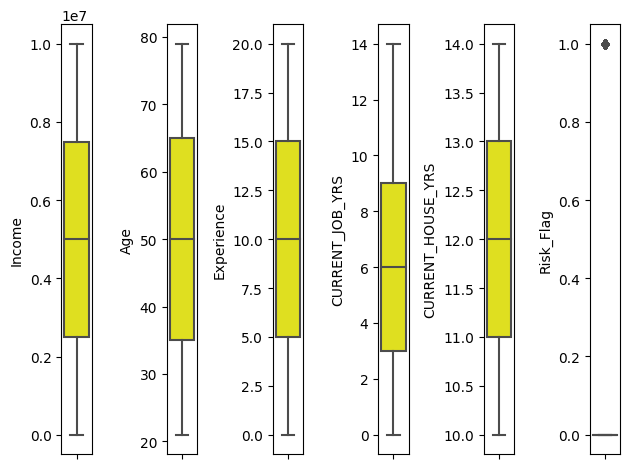

In [48]:
features = numericals
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='yellow', orient='v')
    plt.tight_layout()

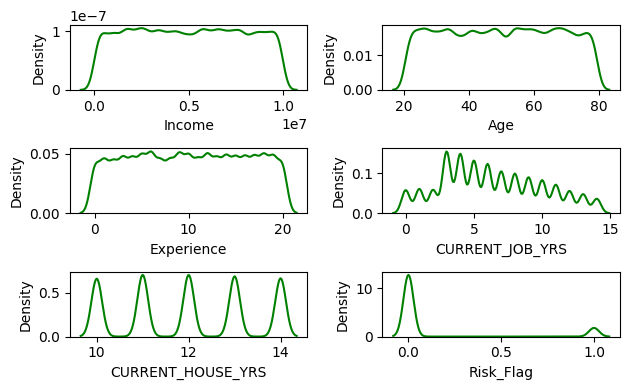

In [30]:
features = numericals
for i in range (0, len(features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

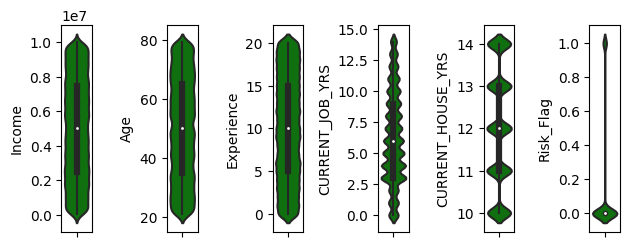

In [37]:
features = numericals
for i in range (0, len(features)):
    plt.subplot(4, len(features), i+1)
    sns.violinplot(y=df[features[i]], color='green')
    plt.tight_layout()

## Categoricals 

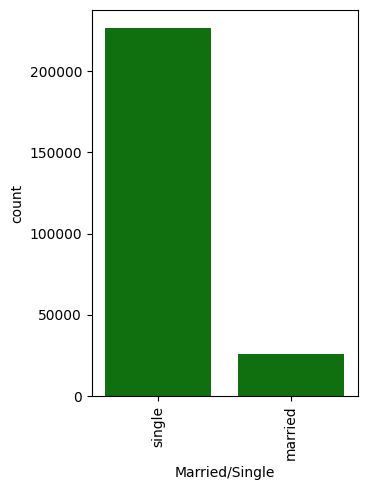

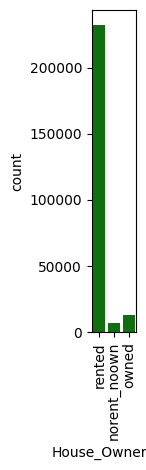

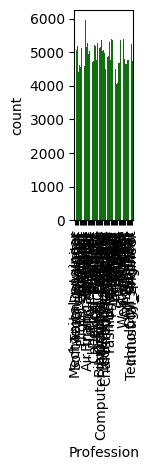

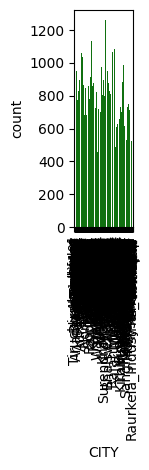

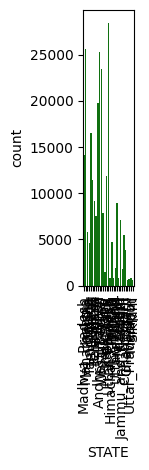

In [21]:
features = categoricals
plt.figure(figsize=(15, 5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 2. Multivariate Analysis

<Axes: >

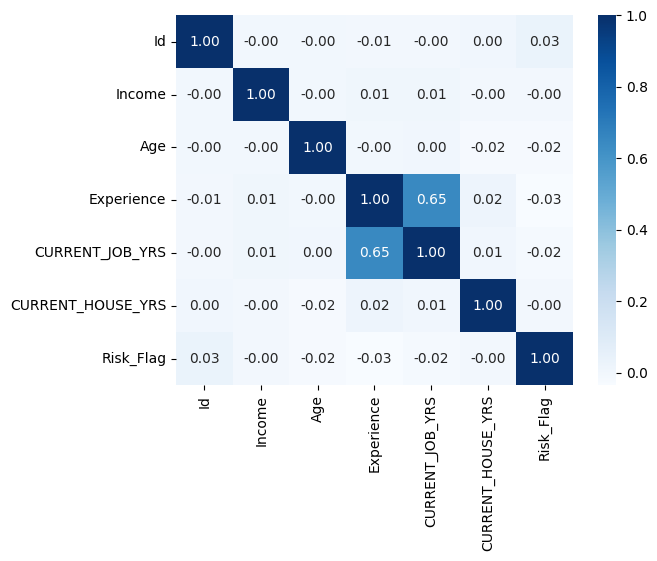

In [17]:
df = df.select_dtypes(exclude=['object'])
df_corr = df.corr()

sns.heatmap(df_corr, cmap='Blues', annot=True, fmt='.2f')

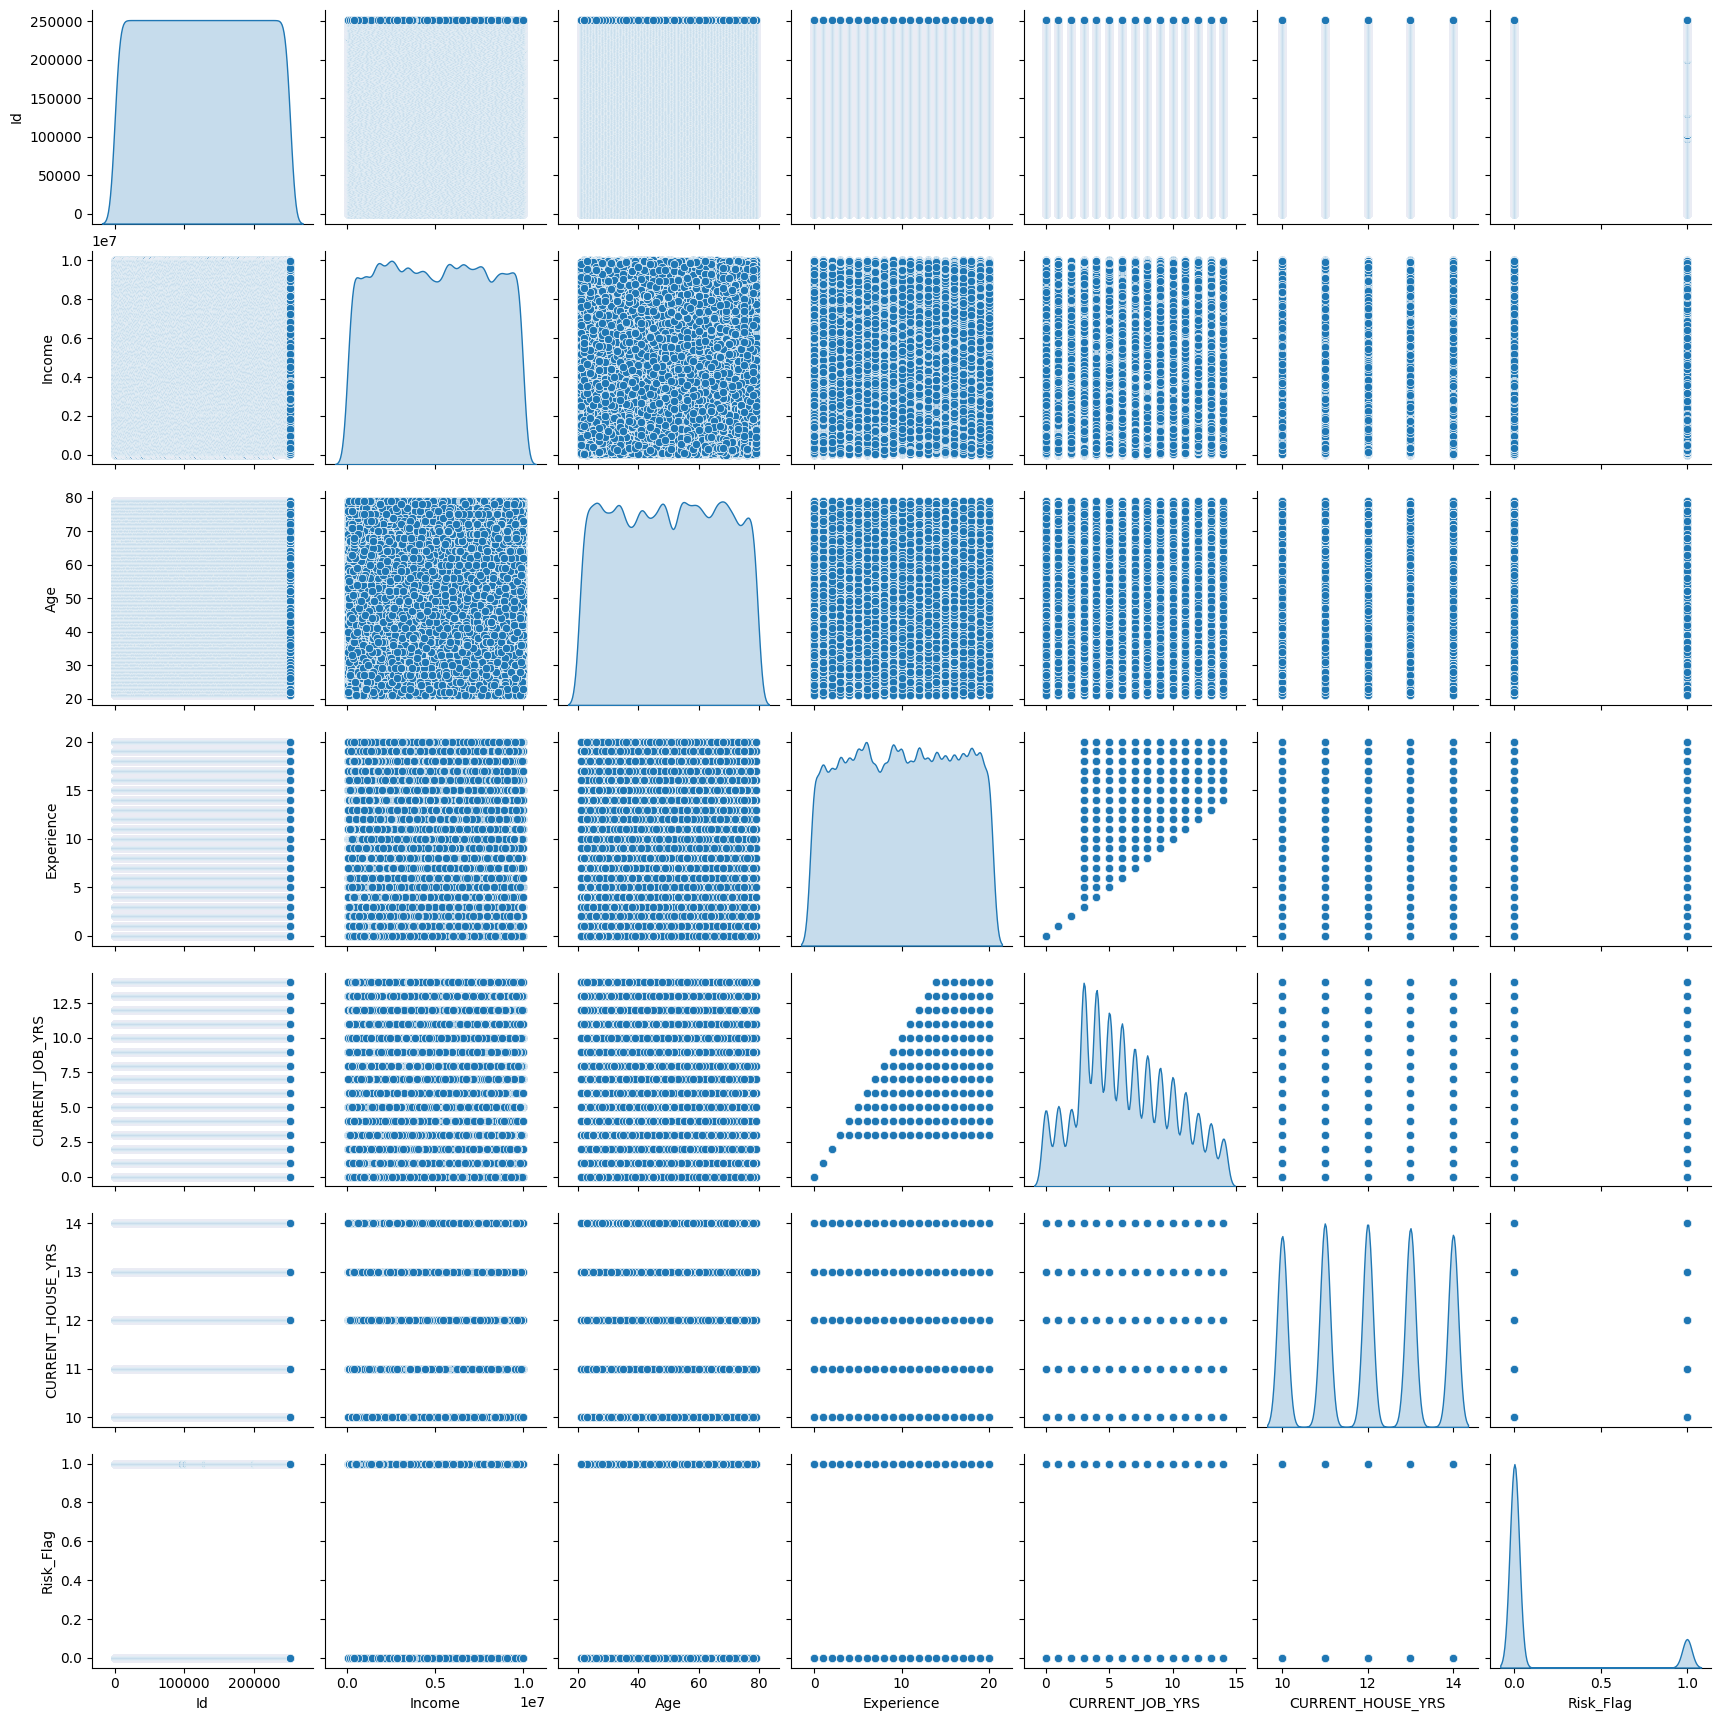

In [19]:
sns.pairplot(df, diag_kind = 'kde')

In [14]:
print(df.columns)

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


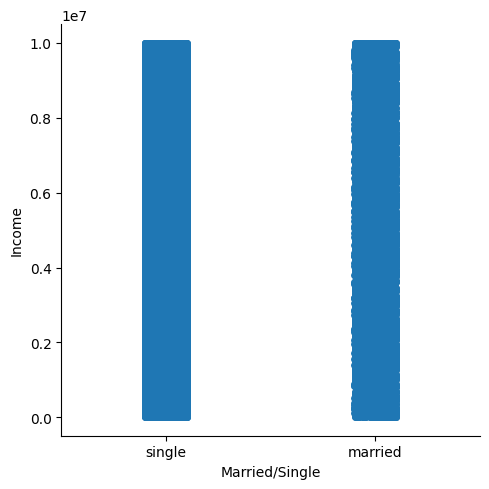

In [16]:
sns.catplot(data=df, x='Married/Single', y='Income')

# 4. Business Insight